In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from numpy.fft import fft2, fftshift, ifft2
!pip install opencv-python
import cv2 # if you do not have cv2 installed, run from the command line "pip install opencv-python" 
%matplotlib inline 
#show plots in the notebook

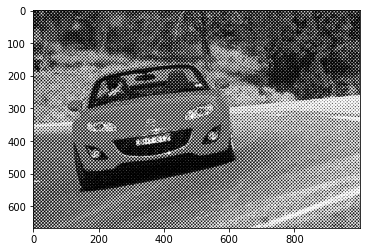

In [2]:
new_im = Image.open("car.png")
np.shape(new_im) # -- We can see that this is RGB image
imshow(new_im, cmap='Greys')

In [3]:
# apply fft2 that refers to 2D fft. fft2() provides us the frequency transform which will be a complex array. It first argument is a greyscale image.
f=np.fft.fft2(new_im)
# next, we apply ffshift() that essentially performs multiplication operation f(x,y)(-1)^(x+y) and then takes the FT of this product.
# we want to place the zero frequency component in the center. Otherwise, it will be at the top left corner. We shift the result in both directions.
fshift=np.fft.fftshift(f)
fshift_copy = fshift.copy()

In [4]:
# we have found DFT
fshift

array([[ 3.86000000e+02-2.84217094e-14j, -5.83240549e+02-3.05439177e+03j,
         9.07297470e+02-1.91343475e+03j, ...,
        -1.10522680e+03+2.60264905e+02j,  9.07297470e+02+1.91343475e+03j,
        -5.83240549e+02+3.05439177e+03j],
       [-3.84726654e+03+5.14244485e+03j,  8.21407273e+02+2.46687054e+02j,
         1.00302161e+03-2.10769270e+02j, ...,
        -2.93236921e+02+1.58500765e+02j, -9.66723621e+01-1.97244083e+01j,
         3.70238323e+02-1.25816595e+03j],
       [-1.67744502e+03+2.66755596e+03j,  1.77036518e+03-1.59951857e+03j,
         1.16294328e+03+1.89689365e+03j, ...,
        -2.71506752e+02+4.97952128e+01j,  5.34407629e+02-1.21178427e+03j,
        -1.77631317e+03+6.65302774e+02j],
       ...,
       [ 1.03245257e+03-3.05421567e+03j,  6.86717199e+02+2.27241985e+02j,
        -9.00656584e+02+9.38276670e+02j, ...,
         2.15780397e+00-3.53461082e+02j, -3.44703544e+02+8.62667473e+01j,
         1.12538718e+03-3.33187603e+02j],
       [-1.67744502e+03-2.66755596e+03j, -1.

In [5]:
# calculate the magnitude of DFT and log scale for the purpose of visualization
magnitude_spectrum=20*np.log(np.abs(fshift))

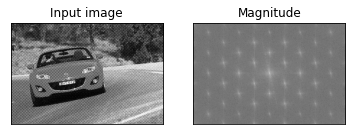

In [6]:
plt.subplot(121), plt.imshow(new_im, cmap='gray')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude'), plt.xticks([]),plt.yticks([])
plt.show()

In [7]:
from skimage.feature import peak_local_max 
coordinates = peak_local_max(magnitude_spectrum, min_distance=45, exclude_border=0)
coordinates

array([[333, 500],
       [266, 400],
       [400, 600],
       [400, 400],
       [266, 600],
       [133, 600],
       [533, 400],
       [133, 400],
       [533, 600],
       [266, 200],
       [400, 800],
       [  0, 600],
       [  0, 400],
       [199, 500],
       [467, 500],
       [266, 800],
       [400, 200],
       [334, 700],
       [332, 300],
       [400,   0],
       [266,   0],
       [133, 200],
       [533, 800],
       [133, 800],
       [533, 200],
       [  0, 200],
       [  0, 800],
       [533,   0],
       [133,   0],
       [  1,   0],
       [665,   0],
       [199, 100],
       [467, 900],
       [665, 400],
       [665, 600],
       [467, 100],
       [199, 900],
       [466, 299],
       [200, 701],
       [599, 300],
       [ 67, 700],
       [600, 700],
       [ 66, 300],
       [200, 301],
       [466, 699],
       [599, 100],
       [ 67, 900],
       [333, 101],
       [333, 899],
       [600, 900],
       [ 66, 100],
       [  0, 999],
       [265,

min-distance is set to be 1 as when min-distance = 1 , maximum number of peaks can be found.

Text(0.5, 1.0, 'The size of the neighbourhood is 13x13')

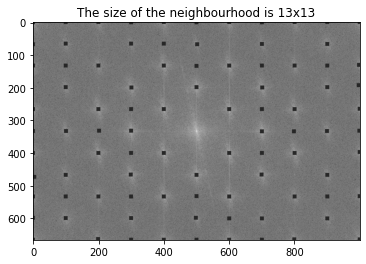

In [8]:
dx,dy=np.shape(new_im)[0], np.shape(new_im)[1] 
new_magnitude=magnitude_spectrum.copy() 
L = 6
for coord in coordinates: 
  i=coord[0] 
  j=coord[1] 
  if i==dx//2 and j==dy//2: 
    continue 
  else: 
    for k1 in np.arange(-L,L,1): 
      for k2 in np.arange(-L,L,1): 
        if i+k1>=0 and j+k2>=0 and i+k1<dx and j+k2<dy: 
            new_magnitude[i+k1,j+k2]=0 
            fshift[i+k1,j+k2]=0 
            # shifted DFT of car image 
imshow(new_magnitude, cmap='gray') 
plt.title("The size of the neighbourhood is "+str(2*L+1)+"x"+str(2*L+1))

In [9]:
# Show the fft with modified frequency components
fshift

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

We can find the inverse FT reconstruct isn't in the same intensity range as the original.


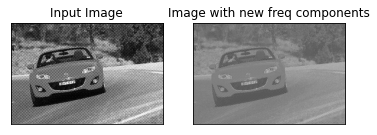

In [10]:
# Perform the inverse Fourier transform
# Shift back (we shifted the center with np.fft.fftshift before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = ifft2(f_ishift)
# take real part of the inverse FT
img_back = img_back.real

plt.subplot(121),plt.imshow(new_im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image with new freq components'), plt.xticks([]), plt.yticks([])
print("We can find the inverse FT reconstruct isn't in the same intensity range as the original.")

In [11]:
# Scale intensities to the range [0, 255]
img_back_with_scaled_intensities=(img_back-np.min(img_back))*255.0/(np.max(img_back)-np.min(img_back))
img = img_back_with_scaled_intensities

(Text(0.5, 1.0, 'Image with scaled intensities'), ([], []), ([], []))

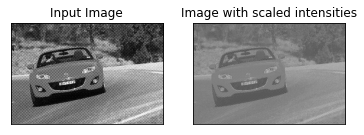

In [12]:
plt.subplot(121),plt.imshow(new_im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap = 'gray')
plt.title('Image with scaled intensities'), plt.xticks([]), plt.yticks([])

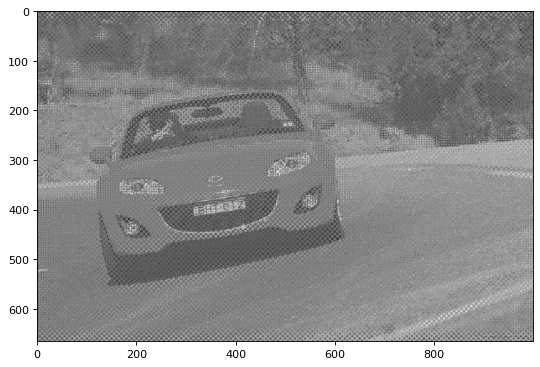

In [13]:
# Create a new figure of the image with a new resolution in dots-per-inch
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(img, cmap='gray');

### 7. Gaussian Low-pass filters is used to remove localized noise in the Fourier domain
We remove the low frequencies by masking with a rectangular window

### 8. We are able to see the license plate number in the reconstructed image.  We need to increase contrast and perform image smoothing to improve image quality.

### 9. Examine the histogram distribution of reconstructed car image intensities and apply intensity transformation in order to increase contrast. 

(array([3.0000e+00, 1.4000e+01, 4.4000e+01, 1.2500e+02, 2.3000e+02,
        3.7300e+02, 6.1600e+02, 9.6900e+02, 1.2540e+03, 1.4800e+03,
        2.0680e+03, 2.9900e+03, 4.0860e+03, 5.0010e+03, 6.3380e+03,
        8.3910e+03, 9.6970e+03, 1.1826e+04, 1.7110e+04, 2.4620e+04,
        3.5840e+04, 5.0945e+04, 5.1212e+04, 4.6694e+04, 4.8622e+04,
        5.2474e+04, 5.3033e+04, 5.3673e+04, 4.5822e+04, 3.6505e+04,
        2.6812e+04, 1.8384e+04, 1.1443e+04, 7.7690e+03, 6.1970e+03,
        4.9130e+03, 3.7810e+03, 3.0520e+03, 2.4540e+03, 2.1310e+03,
        1.7620e+03, 1.5010e+03, 1.3130e+03, 9.2700e+02, 6.3200e+02,
        4.3900e+02, 2.2900e+02, 1.3500e+02, 5.1000e+01, 2.0000e+01]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9

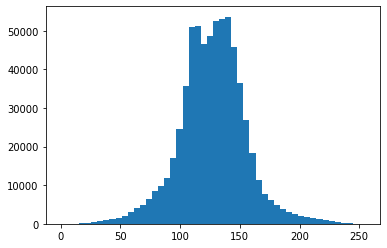

In [14]:
plt.hist(img.ravel(), bins=50)

In [15]:
from skimage import exposure
gamma_corrected = exposure.adjust_gamma(img, 1.5)

(Text(0.5, 1.0, 'Image with scaled intensities'), ([], []), ([], []))

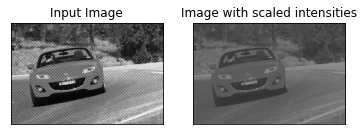

In [16]:
plt.subplot(121),plt.imshow(new_im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gamma_corrected, cmap = 'gray')
plt.title('Image with scaled intensities'), plt.xticks([]), plt.yticks([])

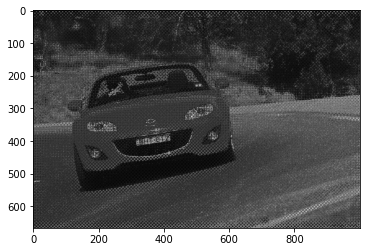

In [17]:
# Applying the contrast stretching function 
# The mid point we choose is m=140 by consulting the histogram distribution above. 
def normalize(intensity, m, E):
       I = intensity
       dx,dy = np.shape(intensity)[0], np.shape(intensity)[1]
       eps=0.001
       cs=np.zeros((dx,dy))
       for i in range(dx):
         for j in range(dy):
           cs[i,j]=1/((1+m/(I[i][j]+eps))**E)
       return cs
g=normalize(gamma_corrected, 150, 25)
imshow(g, cmap='gray')

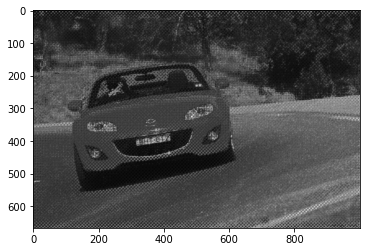

In [18]:
# image smoothing using averaging filter
from skimage.filters.rank import mean
from skimage.morphology import disk
from skimage import img_as_ubyte
img=(g-np.min(g))*255.0/(np.max(g)-np.min(g))
img = img.astype(np.uint8)
loc_mean = mean(img, disk(1.6))
imshow(loc_mean, cmap='gray')

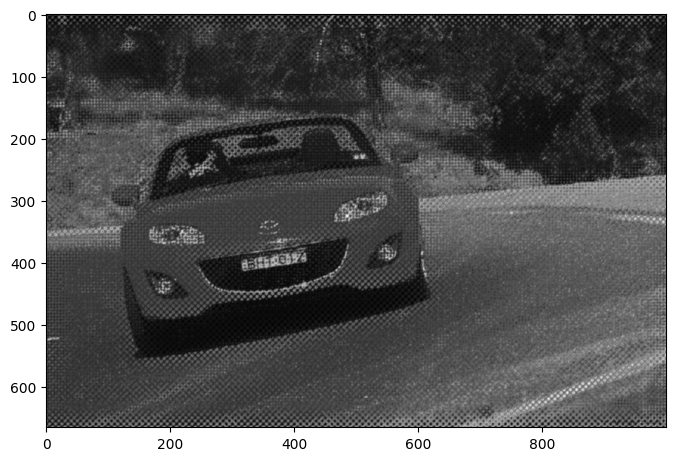

In [19]:

plt.figure(num=None, figsize=(8, 6), dpi=100)
plt.imshow(loc_mean, cmap='gray');